In [59]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [60]:
enddate = date.datetime(2020,3,20)
startdate = date.datetime(2019,3,20)
tick = 'FB'
data = pdr.get_data_yahoo(tick, start = startdate, end = enddate)

In [61]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-20,166.119995,161.240005,161.500000,165.440002,20211500,165.440002
2019-03-21,166.389999,163.750000,164.889999,166.080002,16223000,166.080002
2019-03-22,167.419998,164.089996,165.649994,164.339996,16389200,164.339996
2019-03-25,166.539993,162.000000,163.000000,166.289993,12631200,166.289993
2019-03-26,169.449997,166.350006,167.350006,167.679993,15437900,167.679993


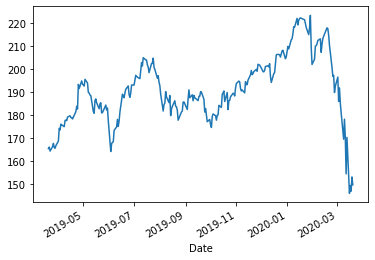

In [62]:
%matplotlib inline
data.Close.plot()

In [63]:
def BBANDS(df,n):
    MA= pd.Series(pd.Series.rolling(df['Close'], n).mean())
    MSD=pd.Series(pd.Series.rolling(df['Close'], n).std())
    b1=MA + (MSD*2)
    B1= pd.Series(b1, name = 'BollingerB_' + str(n))
    df= df.join(B1)
    b2= MA - (MSD*2)
    B2= pd.Series(b2, name = 'Bollinger%b_' + str(n))
    df = df.join(B2)
    return df

In [64]:
df = BBANDS(data,20)

In [65]:
df2 = df[['Close','BollingerB_20','Bollinger%b_20']]

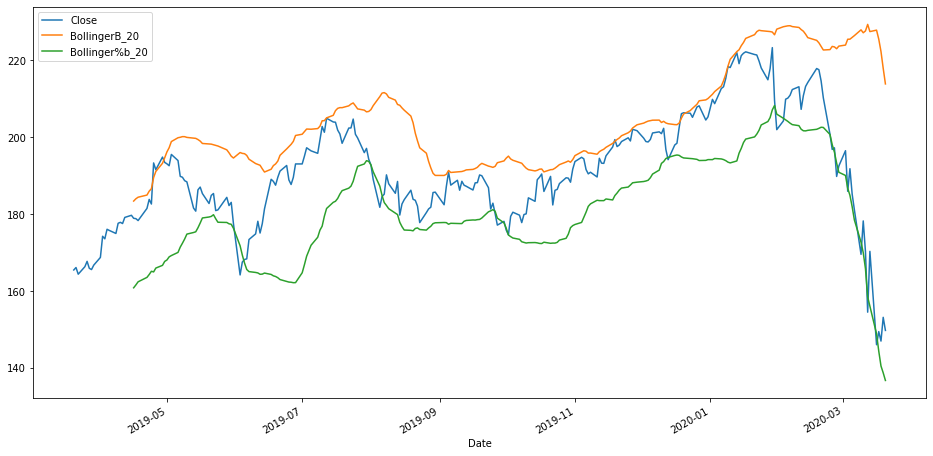

In [66]:
df2.plot(figsize = (16,8))

In [67]:
a = df['BollingerB_20']
b = df['Bollinger%b_20']

data.loc[(data['Close'] < a) & (data['Close'] > b), 'Comportamiento'] = 'Entre bandas'
data.loc[data['Close'] <b, 'Comportamiento'] = 'Cruce de banda superior'
data.loc[data['Close'] >a, 'Comportamiento'] = 'Cruce de banda inferior'

data.loc[(data['Close'] < a) & (data['Close'] > b), 'Recomendacion'] = '-'
data.loc[data['Close'] <b, 'Recomendacion'] = 'Se recomienda vender la accion.'
data.loc[data['Close'] >a, 'Recomendacion'] = 'Se recomienda comprar la accion'

data["Recomendacion"] = data["Recomendacion"].fillna("-")
data["Comportamiento"] = data["Comportamiento"].fillna("Sin informacion")
        

In [68]:
pd.set_option('display.max_rows', None)

In [69]:
data[['Close','Comportamiento', 'Recomendacion']]

,Close,Comportamiento,Recomendacion
Date,,,
2019-03-20,165.440002,Sin informacion,-
2019-03-21,166.080002,Sin informacion,-
2019-03-22,164.339996,Sin informacion,-
2019-03-25,166.289993,Sin informacion,-
2019-03-26,167.679993,Sin informacion,-
2019-03-27,165.869995,Sin informacion,-
2019-03-28,165.550003,Sin informacion,-
2019-03-29,166.690002,Sin informacion,-
2019-04-01,168.699997,Sin informacion,-
